# CIE Lab Transformation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import interpolate

### Read data for different light sources

In [2]:
incan = pd.read_csv('incan.csv')
white_led = pd.read_csv('white_led.csv')
desk = pd.read_csv('desk_lamp.csv')

## Emission Spectrum of Light Sources

In [3]:
def plot_light(light,title):
    cols = light.columns
    wavelength = light[cols[0]].values
    intensity = light[cols[1]].values
    
    plt.figure(figsize=(8,6))
    plt.plot(wavelength,intensity)
    plt.title(title,fontsize=16)
    plt.xlabel('wavelength (nm)',fontsize=14)
    plt.ylabel('intensity (rel)',fontsize=14)
    
#     plt.savefig(title+'.png',dpi=300,bbox_inches='tight')
 
    return wavelength,intensity

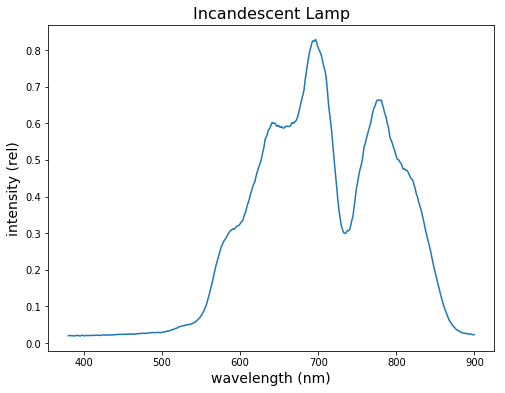

In [4]:
light_wavelength = []
light_intensity = []

incandescent = plot_light(incan,'Incandescent Lamp')
light_wavelength.append(incandescent[0])
light_intensity.append(incandescent[1]/max(incandescent[1]))

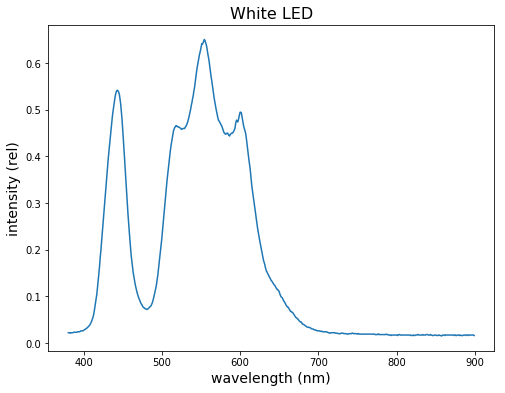

In [5]:
led = plot_light(white_led,'White LED')
light_wavelength.append(led[0])
light_intensity.append(led[1]/max(led[1]))

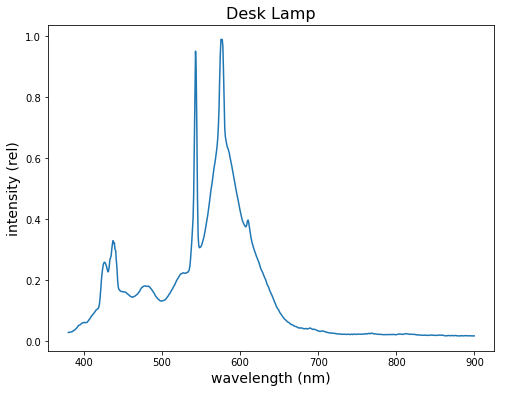

In [6]:
desk_lamp = plot_light(desk,'Desk Lamp')
light_wavelength.append(desk_lamp[0])
light_intensity.append(desk_lamp[1]/max(desk_lamp[1]))

### Read data for CIE Human Standard 1964

In [8]:
data10 = pd.read_excel('cie.15.2004.tables.xls',sheet_name='Table5')
wavelengths10 = np.float_(data10['Table T.5. CIE 1964 standard colorimetric observer'].values[4:-1])

R10 = data10['Unnamed: 1'].values[4:-1]
G10 = data10['Unnamed: 2'].values[4:-1]
B10 = data10['Unnamed: 3'].values[4:-1]

RGB = [R10,G10,B10]

## Macbeth Color Chart Reflectances

In [9]:
macbeth = pd.read_csv('MacbethColorChecker.csv')
macbeth_wavelengths = macbeth['wavelength'].values

In [10]:
def color_chart(patch_index,light_index):
    interp_function = interpolate.interp1d(light_wavelength[light_index],light_intensity[light_index],fill_value='extrapolate')
    light = interp_function(macbeth_wavelengths)
    patch = macbeth[str(patch_index+1)].values
    
    X = np.sum(R10*light*patch)
    Y = np.sum(G10*light*patch)
    Z = np.sum(B10*light*patch)

    Xn = np.sum(R10*light)
    Yn = np.sum(G10*light)
    Zn = np.sum(B10*light)
    
    return X,Y,Z,Xn,Yn,Zn

## CIE Lab Transformation

In [11]:
def f(t):
    if t > (6/29)**3:
        return t**(1/3)
    else:
        return (1/3)*((29/6)**2)*t + (4/29)

In [12]:
def Lab(X,Y,Z,Xn,Yn,Zn):   
    L = 116*f(Y/Yn)-16
    a = 500*(f(X/Xn)-f(Y/Yn))
    b = 200*(f(Y/Yn)-f(Z/Zn))
    
#     print(L,a,b)
    
    return L,a,b

## CIE76 $\Delta$E

In [13]:
def delta_E(patch,light1,light2,chroma):
    L1,a1,b1 = Lab(*color_chart(patch,light1))
    L2,a2,b2 = Lab(*color_chart(patch,light2))
    
    if chroma:
        return np.sqrt((L2-L1)**2 + (a2-a1)**2 + (b2-b1)**2)
    else:
        C1 = np.sqrt(a1**2 + b1**2)
        C2 = np.sqrt(a2**2 + b2**2)
        
        h1 = np.arctan(b1/a1)
        h2 = np.arctan(b2/a2)
        
        return np.sqrt((L2-L1)**2 + (C2-C1)**2 + (h2-h1)**2)

In [14]:
for i in range(24):
    print(delta_E(i,0,1,True))

11.320556956130645
12.0767678566688
8.464661785563148
10.065179186049798
3.454593101388679
20.88012955043923
26.7935683974544
11.885430743743841
33.0992376388714
12.19985344863609
14.9272642455609
15.045826219037997
20.397603647864415
22.938514211120335
40.906593296259295
7.784528760817539
33.22054783005697
23.642067514646907
0.6918943315908584
0.609074906076577
0.5141927387953357
0.4241978272112841
0.4013982174298573
0.2486031690245571


## Chroma and Hue

In [15]:
for i in range(24):
    print(delta_E(i,0,1,False))

9.990954373092613
11.79870994502754
7.36672187165568
8.848630453899796
3.0629980444455747
9.691543645502296
20.25970050447283
4.347406069246138
18.29078490737021
11.730232051210008
12.850227864747822
13.677761014076294
4.443712417689663
22.378783235525045
29.99623389006412
5.754168728338182
19.66177819232518
18.034856446049183
2.9521011237384274
0.8804488132746916
0.9445722474007157
1.0525634305165088
0.5074396264423858
0.2484311066120512
